<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Contexto" data-toc-modified-id="Contexto-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Contexto</a></span></li><li><span><a href="#Lendo-Base" data-toc-modified-id="Lendo-Base-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Lendo Base</a></span></li><li><span><a href="#Data-Prep" data-toc-modified-id="Data-Prep-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Data Prep</a></span><ul class="toc-item"><li><span><a href="#Pycomp-Transformers" data-toc-modified-id="Pycomp-Transformers-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Pycomp Transformers</a></span><ul class="toc-item"><li><span><a href="#Padronização-com-FormataColunas()" data-toc-modified-id="Padronização-com-FormataColunas()-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>Padronização com FormataColunas()</a></span></li><li><span><a href="#Filtro-com-FiltraColunas()" data-toc-modified-id="Filtro-com-FiltraColunas()-3.1.2"><span class="toc-item-num">3.1.2&nbsp;&nbsp;</span>Filtro com FiltraColunas()</a></span></li><li><span><a href="#Target-com-DefineTarget()" data-toc-modified-id="Target-com-DefineTarget()-3.1.3"><span class="toc-item-num">3.1.3&nbsp;&nbsp;</span>Target com DefineTarget()</a></span></li><li><span><a href="#Duplicatas-com-EliminaDuplicatas()" data-toc-modified-id="Duplicatas-com-EliminaDuplicatas()-3.1.4"><span class="toc-item-num">3.1.4&nbsp;&nbsp;</span>Duplicatas com EliminaDuplicatas()</a></span></li></ul></li><li><span><a href="#Construindo-Pipelines" data-toc-modified-id="Construindo-Pipelines-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Construindo Pipelines</a></span><ul class="toc-item"><li><span><a href="#Pipeline-Inicial" data-toc-modified-id="Pipeline-Inicial-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Pipeline Inicial</a></span></li><li><span><a href="#Pipeline-Numérico" data-toc-modified-id="Pipeline-Numérico-3.2.2"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span>Pipeline Numérico</a></span></li><li><span><a href="#Pipeline-Categórico" data-toc-modified-id="Pipeline-Categórico-3.2.3"><span class="toc-item-num">3.2.3&nbsp;&nbsp;</span>Pipeline Categórico</a></span></li><li><span><a href="#Pipeline-Completo" data-toc-modified-id="Pipeline-Completo-3.2.4"><span class="toc-item-num">3.2.4&nbsp;&nbsp;</span>Pipeline Completo</a></span></li></ul></li></ul></li><li><span><a href="#Conclusão" data-toc-modified-id="Conclusão-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Conclusão</a></span></li></ul></div>

<a href="https://pypi.org/project/pycomp/#description"><img src="https://i.imgur.com/WcAaq1P.png" alt="pycomp Logo"></a>
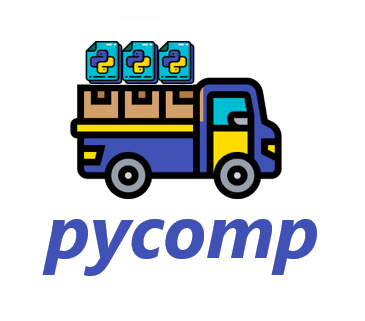

Este notebook tem por objetivo apresentar as funcionalidades do pacote **_pycomp_** como uma forma rápida e eficiente de treinar e avaliar modelos de Machine Learning. Disponível no [PyPi](https://pypi.org/project/pycomp/) e no [GitHub](https://github.com/ThiagoPanini/pycomp), o pacote proporciona a construção de fluxos avançados de preparação e modelagem de dados utilizando poucas linhas de código. Toda a complexidade do processo de ML encontra-se encapsulada em classes e métodos criados para literalmente dar asas aos desenvolvedores e cientistas de dados.

- _Pré requisitos: conhecimento básico em Machine Learning e uma base de dados em mãos!_

    O resto, deixa que o pycomp faz!

# Contexto

Para validar e exemplificar uma aplicação prática do **_pycomp_**, será utilizada a base de dados [Titanic](https://www.kaggle.com/c/titanic): um problema de negócio clássico que envolve o treinamento de modelos de Machine Learning para o entendimento das principais características relacionadas a sobrevivência dos passageiros e tripulantes no naufrágio do icônico navio.

As bases estão disponíveis em dois arquivos (`train.csv` e `test.csv`) e, nas células a seguir, serão utilizadas as funções e classes presentes nos módulos `pycomp.ml.transformers` para a exploração e construção de um fluxo completo de preparação de dados para a futura utilização de um modelo preditivo.

In [28]:
# Importando bibliotecas python
import os
import pandas as pd
from warnings import filterwarnings
filterwarnings('ignore')

In [29]:
# Definindo variáveis do projeto
DATA_PATH = 'titanic_data/'
TRAIN_FILENAME = 'train.csv'
TEST_FILENAME = 'test.csv'

# Lendo Base

In [30]:
# Lendo base de treino e verificando conteúdo
df_train = pd.read_csv(os.path.join(DATA_PATH, TRAIN_FILENAME))
print(f'Dimensões da base de treino: {df_train.shape}')
df_train.head()

Dimensões da base de treino: (891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Uma vez lida a base de treino, é possível analisar os atributos contidos na mesma a partir de seus [metadados](https://www.kaggle.com/c/titanic/data):

- **_PassengerId_:** id do passageiro ou tripulante do navio;
- **_Survived_:** variável resposta indicando a sobrevivência do passageiro ou tripulante;
- **_Pclass_:** categoria indicativa da classe do ticket do passageiro (1=alta, 2=média ou 3=baixa);
- **_Name_:** nome do passageiro ou tripulante;
- **_Sex_:** gênero do passageiro ou tripulante;
- **_Age_:** idade do passageiro ou tripulante;
- **_SibSp_:** quantidade de irmãos ou cônjuges presentes na embarcação;
- **_Parch_:** quantidade de pais ou filhos presentes na embarcação;
- **_Ticket_:** número referente ao ticket do passageiro ou tripulante;
- **_Fare_:** valor da tarifa paga pelo passageiro ou tripulante;
- **_Cabin_:** número da cabine do passageiro ou tripulante;
- **_Embarked_:** porto de embarque do passageiro ou tripulante (C=Cherbourg, Q=Queenstown, S=Southampton).

# Data Prep

Após a leitura e o entendimento da base de dados disponível para análise, é possível iniciar os passos referentes a preparação da nossa base para o treinamento de um modelo de Machine Learning capaz de prever a sobrevivência (`Survived=1`) de um determinado passageiro, utilizando, para tal, um compilado de features extraídas da própria base.

Para detalhar esses passos, serão utilizadas as ferramentas presentes no módulo `ml.transformers` do pacote **_pycomp_** para que, a cada transformação realizada na base, seja possível medir a facilidade envolvida no processo. Para facilitar possíveis comparações, será criada uma cópia da base original para ser utilizada nas transformações a seguir.

In [31]:
# Cópia da base
train = df_train.copy()

## Pycomp Transformers

In [32]:
# Instalando biblioteca com pip
!pip install pycomp --upgrade

Requirement already up-to-date: pycomp in /home/paninit/anaconda3/lib/python3.7/site-packages (0.0.16)


### Padronização com FormataColunas()

De modo a padronizar o fluxo de prep dos dados, o transformer `FormataColunas()` será utilizado para renomear as colunas da base para tratamentos futuros. A partir da execução do método `fit_transform()` dessa classe, os métodos `lower()` e `replace()` são aplicados nas colunas presentes na base.

In [33]:
# Importando classe
from pycomp.ml.transformers import FormataColunas

# Instanciando classe e aplicando método
formatter = FormataColunas()
train_fmt = formatter.fit_transform(train)

# Visualizando resultado
print(f'Colunas da base antes da formatação: {list(df_train.columns)}')
print(f'\nColunas da base após a formatação: {list(train_fmt.columns)}')
train_fmt.head()

Colunas da base antes da formatação: ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']

Colunas da base após a formatação: ['passengerid', 'survived', 'pclass', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket', 'fare', 'cabin', 'embarked']


,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Filtro com FiltraColunas()

Analisando o significado individual de cada coluna presente na base, percebe-se que algumas delas não fazem sentido serem inclusas em um modelo de Machine Learning, como por exemplo, o nome do passageiro ou tripulante (_name_) ou o número do ticket adquirido pelo mesmo (_ticket_). Dessa forma, a partir da execução do método `fit_transform()` da classe `FiltraColunas()`, é possível desenvolver um motor que filtra uma base a partir de uma lista de features passadas como argumento.

In [34]:
# Importando classe
from pycomp.ml.transformers import FiltraColunas

# Instanciando classe e aplicando método
initial_features = ['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked']
selector = FiltraColunas(features=initial_features)
train_slct = selector.fit_transform(train_fmt)

# Verificando resultado
print(f'Colunas da base antes da seleção: {list(train_fmt.columns)}')
print(f'\nColunas da base após a seleção: {list(train_slct.columns)}')
train_slct.head()

Colunas da base antes da seleção: ['passengerid', 'survived', 'pclass', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket', 'fare', 'cabin', 'embarked']

Colunas da base após a seleção: ['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked']


,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


Assim, as colunas `passengerid`, `name`, `ticket` e `cabin` foram retiradas da base por não serem boas candidatas ao modelo preditivo a ser construído posteriormente.

### Target com DefineTarget()

Uma importante tarefa a ser realizada antes da fase de modelagem é a devida preparação da variável resposta do modelo. Em muitos casos, tem-se uma coluna categórica descrevendo as classes positiva e negativa, exigindo assim um passo de mapeamento para transformação das categorias em elementos interpretáveis por um modelo de ML (1s e 0s).

No caso do dataset Titanic, essa transformação não seria necessária, visto que a variável resposta, indicada pela coluna `survived` já é populada com 1 para os sobreviventes e 0 para as vítimas. Porém, para fins de demonstração, vamos utilizar a classe `DefineTarget()` para simular uma preparação possível pra classe target do nosso modelo.

In [35]:
# Importando classe
from pycomp.ml.transformers import DefineTarget

# Instanciando classe e aplicando método
target = 'survived'
pos_class = 1
target_prep = DefineTarget(target_col=target, pos_class=pos_class)
train_tgt = target_prep.fit_transform(train_slct)

# Verificando resultado
print(f'Colunas da base antes da preparação do target: {list(train_slct.columns)}')
print(f'\nColunas da base após a preparação do target: {list(train_tgt.columns)}')
train_tgt.head()

Colunas da base antes da preparação do target: ['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked', 'target']

Colunas da base após a preparação do target: ['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked', 'target']


,pclass,sex,age,sibsp,parch,fare,embarked,target
0,3,male,22.0,1,0,7.2500,S,0
1,1,female,38.0,1,0,71.2833,C,1
2,3,female,26.0,0,0,7.9250,S,1
3,1,female,35.0,1,0,53.1000,S,1
4,3,male,35.0,0,0,8.0500,S,0


O step de preparação da variável target da base se dá pela substituição de uma coluna contendo a variável resposta por 1s (entrada da classe positiva passada como argumento) e 0s (outra(s) entrada(s) categórica(s) contida(s) na coluna original), gerando assim uma nova coluna chamada `target` (ou o nome passado como argumento para a variável `new_target_name`)

### Duplicatas com EliminaDuplicatas()

O tratamento de dados duplicados é um importante passo a ser tomado durante a fase de perparação da base. Entre as possibilidades existentes, a eliminação da duplicatas é uma das mais preferíveis, visto que traz uma forma direta de reduzir a redundância dos dados, auxiliando assim o modelo a converger mais rápido para o erro mínimo computado.

In [36]:
# Importando classe
from pycomp.ml.transformers import EliminaDuplicatas

# Instanciando classe e executando método
dup_dropper = EliminaDuplicatas()
train_nodup = dup_dropper.fit_transform(train_tgt)

# Verificando resultados
print(f'Quantidade de dados duplicados na base antes: {train_tgt.duplicated().sum()}')
print(f'Quantidade de dados duplicados na base depois: {train_nodup.duplicated().sum()}')

Quantidade de dados duplicados na base antes: 111
Quantidade de dados duplicados na base depois: 0


Assim, após a execução do método `fit_transform()` da classe `EliminaDuplicatas()`, 111 registros da base foram eliminados por conter redundância das features. 

Até o momento atual, foram exemplificadas algumas classes pré programadas do módulo `pycomp.ml.transformers` dentro de um contexto inicial de preparação. Os _transformers_ foram aplicados no que poderia ser consideado um "Pipeline inicial" da base logo após a leitura, trazendo alterações comuns a base por completo (sem a separação de variáveis numéricas e categóricas, por exemplo). Na sequência, todos esses passos serão consolidados e novos pipelines serão criados utilizando as funcionalidades do `pycomp`.

## Construindo Pipelines

Após exemplificados individualmente os passos responsáveis por aplicar transformações na base de dados de treino, as ferramentas contidas no módulo `pycomp.ml.transformers` podem ser apresentadas em uma de suas principais vantagens: a construção de um Pipeline de transformação utilizando uma classe nativa do `sklearn`.

Isso se dá pela forma como as classes do módulo `transformers` foram construídas: ao herdar as classes `BaseTransformer` e `TransformerMixin` e, definindo os método `fit()` e `transform()` separadamente, as classes então herdam automaticamente o método `fit_transform()`, sendo este utilizado de forma sequencial dentro de um Pipeline de preparação construído através da classe `Pipeline` do pacote `sklearn`.

### Pipeline Inicial

Em um primeiro momento, para exemplificar essa rica funcionalidade de integração do módulo `transformers`, a célula abaixo será responsável por encapsular todos os transformadores utilizados até o momento em um bloco único. Em seguida, os dados originais serão utilizados como input para aplicação dos steps definidos.

In [37]:
# Importando bibliotecas
from sklearn.pipeline import Pipeline

# Construindo Pipeline
initial_pipeline = Pipeline([
    ('formatter', FormataColunas()),
    ('selector', FiltraColunas(features=initial_features)),
    ('target_prep', DefineTarget(target_col='survived', pos_class=1)),
    ('dup_dropper', EliminaDuplicatas())
])

Construído o pipeline utilizando as classes, abaixo será mostrada novamente a base inicial lida no início do notebook:

In [38]:
# Base original
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [39]:
# Aplicando o pipeline na base original
df_train_prep = initial_pipeline.fit_transform(df_train)
df_train_prep.head()

,pclass,sex,age,sibsp,parch,fare,embarked,target
0,3,male,22.0,1,0,7.2500,S,0
1,1,female,38.0,1,0,71.2833,C,1
2,3,female,26.0,0,0,7.9250,S,1
3,1,female,35.0,1,0,53.1000,S,1
4,3,male,35.0,0,0,8.0500,S,0


Incrível! Em um único objeto chamado de `initial_pipeline` é possível encapsular diferentes _transformers_ em um bloco único de preparação de dados. O método `fit_transform()` desse objeto recebe uma base bruta de entrada e aplica, de forma sequencial, os demais métodos transformadores de cada uma das classes presentes no pipeline criado.

O resultado obtido é uma base de dados inicialmente preparada para análises mais avançadas. Para isso, será proposto abaixo uma separação da base de dados por tipo primitivo, criando assim duas vertentes de preparação: uma para os dados numéricos e outra para os dados categóricos.

In [40]:
# Separando dados em X e y
X = df_train_prep.drop('target', axis=1)
y = df_train_prep['target'].values

# Separando colunas numéricas e categóricas
num_features = [col for col, dtype in X.dtypes.items() if dtype != 'object']
cat_features = [col for col, dtype in X.dtypes.items() if dtype == 'object']

# Separando bases
X_num = X[num_features]
X_cat = X[cat_features]

# Verificando
print(f'Variáveis numéricas da base:\n{num_features}')
print(f'\nVariáveis categóricas da base:\n{cat_features}')

Variáveis numéricas da base:
['pclass', 'age', 'sibsp', 'parch', 'fare']

Variáveis categóricas da base:
['sex', 'embarked']


### Pipeline Numérico

Nesse momento da preparação, é necessário analisar separadamente dados numéricos e categóricos de modo a entender a melhor forma de contornar algumas situações específicas para cada tipo primitivo. No caso dos dados numéricos, é preciso investigar a presença e a origem de possíveis dados nulos presentes nessas colunas.

In [41]:
# Verificando dados nulos
X.isnull().sum()

pclass        0
sex           0
age         104
sibsp         0
parch         0
fare          0
embarked      2
dtype: int64

O preenchimento dos dados nulos é um fator de extrema importante em um fluxo de data prep de modelos preditivos. Cabe ao analista/cientista analisar pontualmente a origem de tais dados para que uma decisão assertiva possa ser tomada visando uma melhor performance do modelo. Neste ponto do processo, o módulo `pycomp.ml.transformers` traz algumas possibilidades, tais como:

- `PreencheDadosNulos()`: preenchimento de dados nulos, em determinadas colunas, por um valor fixo definido nos argumentos da classe
- `EliminaDadosNulos()`: classe responsável por eliminar as linhas da base que contenham dados nulos

Entretanto, dado o contexto dos dados, entende-se mais vantajosa a utilização da classe `SimpleImputer` do módulo `sklearn.preprocessing` para o preenchimento dinâmico dos dados nulos a partir de uma medida estatística (média, mediana, entre outras)

In [42]:
# Importando biblioteca
from sklearn.impute import SimpleImputer

# Criando pipeline numérico
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median'))
])

# Executando e verificando pipeline numérico
X_num_imp = num_pipeline.fit_transform(X_num)
print(f'Dados nulos antes do imputer: {X_num.isnull().sum().sum()}')
print(f'Dados nulos após o imputer: {pd.DataFrame(X_num_imp).isnull().sum().sum()}')

Dados nulos antes do imputer: 104
Dados nulos após o imputer: 0


### Pipeline Categórico

No pipeline categórico, o único passo adotado será dado a partir da utilização de uma classe disponibilizada pelo módulo `pycomp.ml.transformers` cujo objetivo é aplicar o processo de _encoding_ nos dados. Trata-se de classe `DummiesEncoding()`, utilizada logo a seguir:

In [43]:
# Importando classe
from pycomp.ml.transformers import DummiesEncoding

# Criando pipeline categórico
cat_pipeline = Pipeline([
    ('encoder', DummiesEncoding(dummy_na=True))
])

# Executando pipeline categórico
X_cat_enc = cat_pipeline.fit_transform(X_cat)

In [44]:
# Antes da aplicação do pipeline
X_cat.head()

,sex,embarked
0,male,S
1,female,C
2,female,S
3,female,S
4,male,S


In [45]:
# Após a aplicação do pipeline
X_cat_enc.head()

,sex_female,sex_male,sex_nan,embarked_C,embarked_Q,embarked_S,embarked_nan
0,0,1,0,0,0,1,0
1,1,0,0,1,0,0,0
2,1,0,0,0,0,1,0
3,1,0,0,0,0,1,0
4,0,1,0,0,0,1,0


E assim, em mais uma classe previamente desenvolvida, foi possível aplicar um processo extremamente útil para uma preparação categórica nos dados com apenas uma linha de código. Além da funcionalidade de `encoder`, a classe `DummiesEncoding()` também armazena as features registradas após o processo em um atributo retornável (`features_after_encoding`)

In [46]:
# Retornando features após o encoding
cat_encoded_features = cat_pipeline.named_steps['encoder'].features_after_encoding
cat_encoded_features

['sex_female',
 'sex_male',
 'sex_nan',
 'embarked_C',
 'embarked_Q',
 'embarked_S',
 'embarked_nan']

Com isso, é possível unir novamente o conjunto de features numéricas com esse novo compilado de features categóricas para gerar o conjunto final de features do modelo preiditvo a ser treinado

In [47]:
# Definindo features dos modelos a serem treinados
model_features = num_features + cat_encoded_features
print(f'Ao todo, serão utilizadas {len(model_features)} features no processo de modelagem')

Ao todo, serão utilizadas 12 features no processo de modelagem


### Pipeline Completo

Por fim, é possível agora unir os pipelines numérico e categórico em um único transformador utilizando a classe `ColumnTransformer` nativa do `sklearn`.

In [48]:
# Importando biblioteca
from sklearn.compose import ColumnTransformer

# Criando pipeline completo
full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_features),
    ('cat', cat_pipeline, cat_features)
])

Simulando um fluxo completo de **treino** a partir do recebimento dos dados brutos, **para essa tarefa em específico**, tem-se:
___
1. Leitura dos dados recebidos;
2. Aplicação do pipeline inicial de preparação;
3. Aplicação do pipeline completo;
4. Modelagem
___

In [49]:
# Leitura da base bruta recebida
df_train = pd.read_csv(os.path.join(DATA_PATH, TRAIN_FILENAME))

# Aplicando pipeline inicial
df_train_prep = initial_pipeline.fit_transform(df_train)

# Separando dados
X = df_train_prep.drop('target', axis=1)
y = df_train_prep['target'].values

# Aplicando pipeline completo
X_prep = full_pipeline.fit_transform(X)

In [50]:
# Retornando parâmetros para sanity check
cat_encoded_features = full_pipeline.named_transformers_['cat'].named_steps['encoder'].features_after_encoding
model_features = num_features + cat_encoded_features
print(f'Dimensões dos dados após a preparação: {X_prep.shape}')
print(f'Quantidade de features consideradas: {len(model_features)}')

Dimensões dos dados após a preparação: (780, 12)
Quantidade de features consideradas: 12


# Conclusão

Neste notebook, foram abordados tópicos referentes a construção de pipelines de preparação de dados frente a posterior execução de um modelo preditivo. Para tal, foram utilizadas algumas funcionalidades do módulo `pycomp.ml.transformers` em prol da facilitação do desenvolvimento desse fluxo de prep a partir de classes já construídas para fins específicos do processo. Considerando o contexto do dataset [Titanic](), os componentes `pycomp` utilizados foram:

| Classe | Contexto | Utilização |
| :- | :- | :- |
| FormataColunas() | initial_pipeline | Padronização de nomes de colunas da base
| FiltraColunas() | initial_pipeline | Seleção de features a serem utilizadas no estudo
| DefineTarget() | initial_pipeline | Definição de variável target a partir de uma classe positiva
| EliminaDuplicatas() | initial_pipeline | Eliminação de dados duplicados na base
| DummiesEncoding() | cat_pipeline | Aplicação de procedimento de encoding em variáveis categóricas

É importante citar que existem outros transformadores no módulo `pycomp.ml.transformers` que não foram utilizados nesse exemplo por conta do próprio contexto dos dados. Ferramentas para preenchimento de dados nulos, separação automática de dados de treino e teste, entre outras, podem ser encontradas no pacote e estão disponíveis para uso.

No mais, a partir dos passos dados neste notebook, foi possível perceber a grande facilidade disponibilizada pela utilização de funções e classes prontas na construção de pipelines avançados de data prep. O próximo passo do fluxo completo de modelagem será abordado em um outro notebook.